In [249]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

class Sandpile:
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.grid = np.full((grid_size, grid_size), 3, dtype=int)
        self.t = 0
        self.pl_data = []
    
    def add_sand(self, x, y, grains=1):
        self.grid[x, y] += grains
        self.topple()

    def find_high_piles(self):
        x, y = np.where(self.grid > 4)
        return list(zip(x, y))

        
    def topple(self):
        unstable = True
        num_affected_squares = 0
        while unstable:
            high_piles_coords = self.find_high_piles()
            num_affected_squares += len(high_piles_coords)
            for x, y in high_piles_coords:
                self.grid[x, y] -= 4
                if x > 0: self.grid[x-1, y] += 1
                if x < self.grid_size - 1: self.grid[x+1, y] += 1
                if y > 0: self.grid[x, y-1] += 1
                if y < self.grid_size - 1: self.grid[x, y+1] += 1
                        
            if len(self.find_high_piles()) == 0:
                unstable = False
                self.t += 1
                
        self.pl_data.append(num_affected_squares)

    



    def get_grid(self):
        return self.grid
    
    def three_d_histogram(self, save = True, dir_name = "3d", image_name = "hist_3d.png"):
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            xpos, ypos = np.meshgrid(np.arange(self.grid_size), np.arange(self.grid_size))
            xpos = xpos.flatten()
            ypos = ypos.flatten()
            zpos = np.zeros_like(xpos)
            dx = dy = 1
            dz = self.grid.flatten()
            ax.set_zlim(0, 4)
            ax.bar3d(xpos, ypos, zpos, dx, dy, dz, cmap='viridis')
            plt.title('Sandpile Model Histogram')
            if save == True:
                plt.savefig(os.path.join(dir_name, image_name))
                plt.close()  # Close the plot to avoid memory issues
            else:
                plt.show()    

In [250]:
def run_simulations(grid_size, num_grains, num_simulations):
    all_pl_data = []

    for _ in tqdm(range(num_simulations), desc="Running simulations"):
        sandpile = Sandpile(grid_size)
        coordinates = np.random.randint(0, grid_size, size=(num_grains, 2))

        for coord in coordinates:
            sandpile.add_sand(coord[0], coord[1])

        all_pl_data.append(sandpile.pl_data)

    return all_pl_data

def average_data(d):
    d = np.swapaxes(d, 1, 0)
    return d.mean(axis=1)

In [252]:
# Example usage
grid_size = 50
num_grains = 10000
num_simulations = 200
dir_name = "3d"
os.makedirs(dir_name, exist_ok=True)

# Run multiple simulations and gather data
all_simulation_data = run_simulations(grid_size, num_grains, num_simulations)



Running simulations: 100%|██████████| 200/200 [10:33<00:00,  3.17s/it]


In [254]:
d = average_data(all_simulation_data)
print(len(d))

10000


/tmp/ipykernel_12528/3791036315.py:3: RuntimeWarning: divide by zero encountered in log
  log_y = np.log(sorted_data)


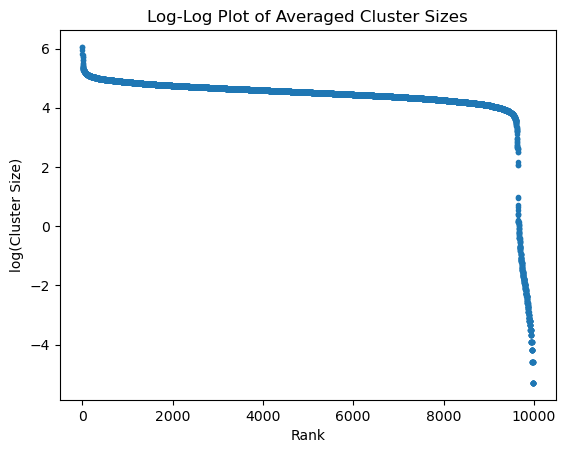

In [255]:
# Sort and log-transform the data
sorted_data = sorted(d, reverse=True)
log_y = np.log(sorted_data)


# Plot the results
plt.figure()
plt.plot(np.arange(len(log_y)), log_y, marker='o', linestyle='none', markersize=3)
plt.xlabel('Rank')
plt.ylabel('log(Cluster Size)')
plt.title('Log-Log Plot of Averaged Cluster Sizes')
plt.show()